In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


608

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | asfi
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | banjar
Processing Record 4 of Set 1 | puerto del rosario
Processing Record 5 of Set 1 | lasa
Processing Record 6 of Set 1 | dunedin
Processing Record 7 of Set 1 | general pico
Processing Record 8 of Set 1 | aklavik
Processing Record 9 of Set 1 | kirkwood
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | burica
City not found. Skipping...
Processing Record 13 of Set 1 | sola
Processing Record 14 of Set 1 | lahaina
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | mwene-ditu
Processing Record 20 of Set 1 | spearfish
Processing R

Processing Record 36 of Set 4 | thompson
Processing Record 37 of Set 4 | souillac
Processing Record 38 of Set 4 | makakilo city
Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | caranavi
Processing Record 41 of Set 4 | ferrol
Processing Record 42 of Set 4 | buala
Processing Record 43 of Set 4 | kabare
Processing Record 44 of Set 4 | lucapa
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | akyab
Processing Record 48 of Set 4 | bosaso
Processing Record 49 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 50 of Set 4 | port lincoln
Processing Record 1 of Set 5 | isla vista
Processing Record 2 of Set 5 | rosarito
Processing Record 3 of Set 5 | norman wells
Processing Record 4 of Set 5 | watsa
Processing Record 5 of Set 5 | borogontsy
Processing Record 6 of Set 5 | diu
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | san francisco
Processing Record 9 of Set 5

Processing Record 27 of Set 8 | talcahuano
Processing Record 28 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 29 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 30 of Set 8 | vaitape
Processing Record 31 of Set 8 | mindelo
Processing Record 32 of Set 8 | namibe
Processing Record 33 of Set 8 | kununurra
Processing Record 34 of Set 8 | samana
Processing Record 35 of Set 8 | manado
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | ambilobe
Processing Record 38 of Set 8 | eureka
Processing Record 39 of Set 8 | timbakion
City not found. Skipping...
Processing Record 40 of Set 8 | dawei
Processing Record 41 of Set 8 | tortoli
Processing Record 42 of Set 8 | diego de almagro
Processing Record 43 of Set 8 | novo aripuana
Processing Record 44 of Set 8 | radovitskiy
Processing Record 45 of Set 8 | saldanha
Processing Record 46 of Set 8 | samusu
City not found. Skipping...
Processing Record 47 of Set 8 | rexburg
Processing R

Processing Record 15 of Set 12 | mattru
Processing Record 16 of Set 12 | burns lake
Processing Record 17 of Set 12 | nicolas de pierola
Processing Record 18 of Set 12 | aden
Processing Record 19 of Set 12 | tinjah
City not found. Skipping...
Processing Record 20 of Set 12 | viligili
City not found. Skipping...
Processing Record 21 of Set 12 | priiskovyy
Processing Record 22 of Set 12 | qinhuangdao
Processing Record 23 of Set 12 | warqla
City not found. Skipping...
Processing Record 24 of Set 12 | don sak
Processing Record 25 of Set 12 | ohara
Processing Record 26 of Set 12 | rawah
Processing Record 27 of Set 12 | grindavik
Processing Record 28 of Set 12 | nueva gerona
Processing Record 29 of Set 12 | belogorsk
Processing Record 30 of Set 12 | kautokeino
Processing Record 31 of Set 12 | half moon bay
Processing Record 32 of Set 12 | quito
Processing Record 33 of Set 12 | sommerda
Processing Record 34 of Set 12 | shchebetovka
Processing Record 35 of Set 12 | ambon
Processing Record 36 of

In [7]:
len(city_data)

559

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Asfi,32.2994,-9.2372,61.09,81,100,2.71,MA,2022-03-19 20:04:44
1,Banjar,-8.1900,114.9675,77.47,91,100,3.96,ID,2022-03-19 20:07:12
2,Puerto Del Rosario,28.5004,-13.8627,65.95,63,20,13.80,ES,2022-03-19 20:07:12
3,Lasa,46.6166,10.7002,38.82,97,97,5.70,IT,2022-03-19 20:07:13
4,Dunedin,-45.8742,170.5036,53.69,87,0,7.81,NZ,2022-03-19 20:07:13
5,General Pico,-35.6566,-63.7568,73.45,26,100,11.14,AR,2022-03-19 20:03:24
6,Aklavik,68.2191,-135.0107,-5.80,65,100,11.50,CA,2022-03-19 20:07:14
7,Kirkwood,38.5834,-90.4068,58.51,48,20,19.57,US,2022-03-19 20:07:15
8,Rikitea,-23.1203,-134.9692,79.92,75,7,8.90,PF,2022-03-19 20:07:15
9,Ancud,-41.8697,-73.8203,64.22,60,100,1.99,CL,2022-03-19 20:07:15


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Asfi,MA,2022-03-19 20:04:44,32.2994,-9.2372,61.09,81,100,2.71
1,Banjar,ID,2022-03-19 20:07:12,-8.1900,114.9675,77.47,91,100,3.96
2,Puerto Del Rosario,ES,2022-03-19 20:07:12,28.5004,-13.8627,65.95,63,20,13.80
3,Lasa,IT,2022-03-19 20:07:13,46.6166,10.7002,38.82,97,97,5.70
4,Dunedin,NZ,2022-03-19 20:07:13,-45.8742,170.5036,53.69,87,0,7.81


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

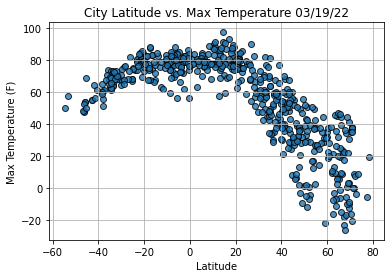

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

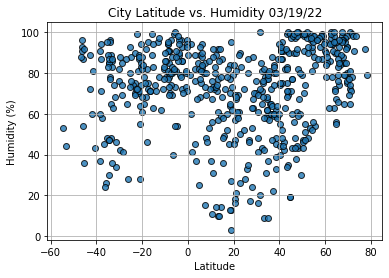

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

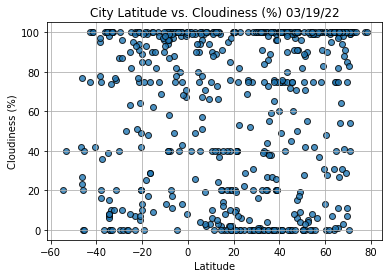

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

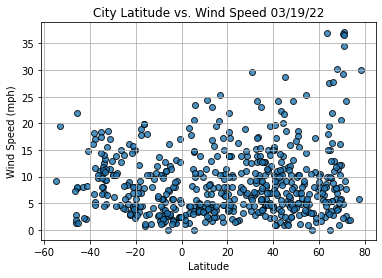

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()